In [1]:
import flickrapi
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os

args = Namespace(
    # Data and Path information
    api_key = u'9e32e17383e134335b5cabf2eb186b7a',
    api_secret = u'781aa9cac0a656c9',
    radius = 5,
    save_dir = 'data_storage/'
)

In [212]:
with open(args.save_dir+'grid/Photo_info.p', 'rb') as fp:
    Photos = pickle.load(fp)

In [214]:
with open(args.save_dir+'grid/completed.p', 'rb') as fp:
    comp = pickle.load(fp)

In [213]:
len(Photos.keys())

22281

In [215]:
len(comp)

73

In [216]:
completed = pd.read_csv(args.save_dir+'grid/completed.csv')
completed.iloc[-2:]

,Unnamed: 0,Unnamed: 1,lat,lon,collected,total
71,3,11,45.425186,12.336316,2869.0,21246.0
72,3,12,45.425186,12.340431,2012.0,21820.0


In [217]:
df=pd.read_csv(args.save_dir+'grid/photos.csv',sep='\t').rename(columns={'Unnamed: 0':'ids'})

In [218]:
len(df)

22341

In [237]:
df.head()

,ids,owner,owner_loc,title,description,comments,taken,views,people,tags,lat,lon,neighbourhood,url,date
0,50770182122,51973207@N00,NaN,Campo Santi Apostoli,Venice - January 2019,0,2019-01-06 09:20:55,6,0,"[{'id': '6867053-50770182122-166', 'author': '...",45.440298,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...,2019
1,50770181367,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:19:10,0,0,"[{'id': '6867053-50770181367-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507701...,2019
2,50770065816,51973207@N00,NaN,Sestiere di Cannaregio,Venice - January 2019,0,2019-01-06 09:17:36,0,0,"[{'id': '6867053-50770065816-166', 'author': '...",45.440064,12.336573,Rialto,https://www.flickr.com/photos/noukorama/507700...,2019
3,50770737177,54945580@N04,Bergamo,Characteristic Venetian alley,Sony a7rII | LA-EA3 | Sony AF 70-400 F4-5.6 G SSM,3,2018-10-14 14:20:37,85,0,"[{'id': '54913441-50770737177-5196', 'author':...",45.437688,12.334850,Rialto,https://www.flickr.com/photos/mario_alpha/5077...,2018
4,50769627753,127349327@N05,"Perth, Western Australia","Arch and Steps, Corte dei Conti, Campo Sant'An...",NaN,2,2017-10-03 11:35:09,64,0,"[{'id': '127343987-50769627753-747', 'author':...",45.434138,12.331500,Venice,https://www.flickr.com/photos/studiaphotos/507...,2017


In [219]:
df['neighbourhood'].unique()

array(['Rialto', 'Venice', nan, 'Dorsoduro', 'San Marco', 'Cannaregio',
       'Sestière di San Polo', 'Piazzale Roma', 'Santa Croce', 'Castello',
       'Giudecca', 'San Nicolò di Lido', 'San Lazzaro degli Armeni',
       'Murano', 'Punta Sabbioni', 'Mazzorbo', 'San Giorgio Maggiore',
       'Quartiere S. Elena', 'Quartiere San Giacomo', "Sant'Erasmo",
       'Moranzani', 'Venice-Lido', 'Quartiere Campo di Marte',
       'Città Giardino', "Sant'Elena", 'Fusina', 'Tessera', 'Mestre',
       'San Giuliano - Venezia', 'Vignola Piccola', 'Malamocco',
       'San Polo', 'San Croce', 'Isola Sacca Fisola',
       'Isola della Guidella', 'Isola dis Giorgio', 'Lido di Venezia',
       'Isola delle Tesse'], dtype=object)

In [220]:
df['people'].describe()

count    22341.000000
mean         0.003178
std          0.056285
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: people, dtype: float64

In [221]:
df[df.people==1]['url'].iloc[0]

'https://www.flickr.com/photos/alessiacross/50247909213/'

In [236]:
df['date'] = df['taken'].apply(lambda x: int(x[:4]))

In [238]:
df['date'].describe()

count    22341.000000
mean      2014.188667
std          4.431624
min       1875.000000
25%       2011.000000
50%       2014.000000
75%       2018.000000
max       2020.000000
Name: date, dtype: float64

In [248]:
len(df[df.date<2010])

2720

In [251]:
df['owner_loc'].unique()

array([nan, 'Bergamo', 'Perth, Western Australia', ..., 'Méru, France',
       'Martellago  (Venezia), Italia',
       'Seattle, WA (SEA), United States'], dtype=object)

In [222]:
df['lat'].describe()

count    22341.000000
mean        45.429423
std          0.006294
min         45.383501
25%         45.426053
50%         45.427875
75%         45.433093
max         45.505277
Name: lat, dtype: float64

In [223]:
df['lon'].describe()

count    22341.000000
mean        12.337221
std          0.013858
min         12.227775
25%         12.327060
50%         12.333152
75%         12.342367
max         12.416074
Name: lon, dtype: float64

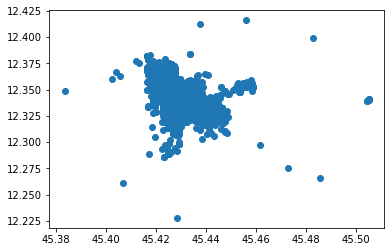

In [224]:
import matplotlib.pyplot as plt
plt.scatter(df['lat'],df['lon'])

(array([1.0000e+00, 4.0000e+00, 1.3760e+03, 1.5128e+04, 5.4040e+03,
        3.6900e+02, 5.0000e+01, 1.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([45.383501 , 45.3956786, 45.4078562, 45.4200338, 45.4322114,
        45.444389 , 45.4565666, 45.4687442, 45.4809218, 45.4930994,
        45.505277 ]),
 <BarContainer object of 10 artists>)

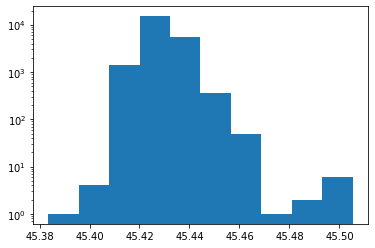

In [245]:
plt.hist(df['lat'],log=True)

(array([1.0000e+00, 1.0000e+00, 2.0000e+00, 2.9000e+01, 1.6290e+03,
        1.4551e+04, 4.0000e+03, 2.1170e+03, 8.0000e+00, 3.0000e+00]),
 array([12.227775 , 12.2466049, 12.2654348, 12.2842647, 12.3030946,
        12.3219245, 12.3407544, 12.3595843, 12.3784142, 12.3972441,
        12.416074 ]),
 <BarContainer object of 10 artists>)

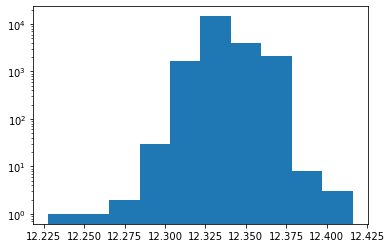

In [244]:
plt.hist(df['lon'],log=True)

(array([2.2147e+04, 1.2600e+02, 3.4000e+01, 1.9000e+01, 3.0000e+00,
        7.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([    0.,  6303., 12606., 18909., 25212., 31515., 37818., 44121.,
        50424., 56727., 63030.]),
 <BarContainer object of 10 artists>)

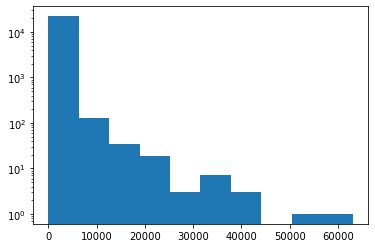

In [246]:
plt.hist(df['views'],log=True)

(array([1762., 1756., 1859., 1738., 1532., 2098., 1597., 1302., 1983.,
        2490.]),
 array([2011. , 2011.9, 2012.8, 2013.7, 2014.6, 2015.5, 2016.4, 2017.3,
        2018.2, 2019.1, 2020. ]),
 <BarContainer object of 10 artists>)

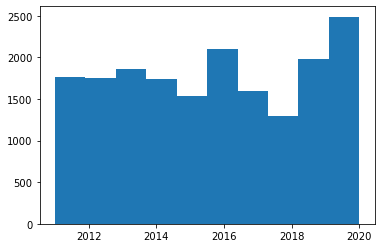

In [242]:
plt.hist(df[df.date>2010]['date'])

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 6.0000e+00, 3.3000e+01, 2.8500e+02, 2.2013e+04]),
 array([1875. , 1889.5, 1904. , 1918.5, 1933. , 1947.5, 1962. , 1976.5,
        1991. , 2005.5, 2020. ]),
 <BarContainer object of 10 artists>)

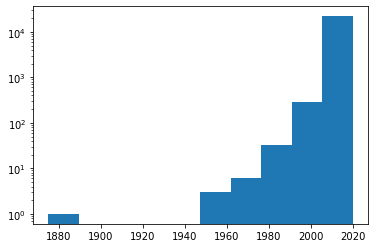

In [243]:
plt.hist(df['date'],log=True)